# Library Installation and Setup

In [ ]:
!pip install torch torchvision torchaudio
!pip install easyocr
!pip install opencv-python
!pip install matplotlib

In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Read Image

In [ ]:
IMAGE_PATH = "/content/ocr.png"

In [ ]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[25, 3], [127, 3], [127, 17], [25, 17]],
  'Dr: Onkar Bhave',
  0.853905927692061),
 ([[321, 3], [389, 3], [389, 17], [321, 17]],
  'Care Clinic',
  0.980794413275986),
 ([[25, 19], [115, 19], [115, 31], [25, 31]],
  'MBBS,MD,MS:',
  0.4382965109252091),
 ([[123, 19], [207, 19], [207, 33], [123, 33]],
  'Reg: No: 270988',
  0.35621658914341725),
 ([[319, 19], [471, 19], [471, 31], [319, 31]],
  'Near Axls Bank; Kuthrud Pune',
  0.397550282005105),
 ([[25, 33], [137, 33], [137, 45], [25, 45]],
  'Mob No: 8903390126',
  0.929793267489902),
 ([[319, 33], [363, 33], [363, 45], [319, 45]], '411038', 0.9999827718526587),
 ([[240, 38], [291, 38], [291, 51], [240, 51]],
  'LOREM IPSUA"',
  0.11140240079195053),
 ([[319, 44], [487, 44], [487, 61], [319, 61]],
  'Ph: 094233 80390, Tirning: 09.00',
  0.7365843108619115),
 ([[319, 59], [395, 59], [395, 71], [319, 71]],
  'AM-02.00 PM',
  0.8394417923880327),
 ([[399, 59], [487, 59], [487, 73], [399, 73]],
  'Closed: Thursday',
  0.6190495584951

# Drawing Image

In [ ]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font_scale = 1.5
font = cv2.FONT_HERSHEY_SIMPLEX

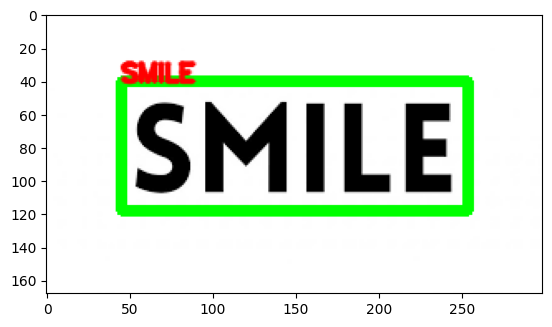

In [ ]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, .5, (255,0,0), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

# Multiline Handling

In [ ]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_SIMPLEX

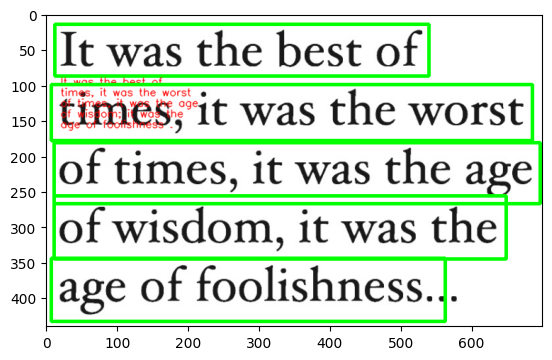

In [ ]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(255,0,0),1,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()

# Image Pre-processing

In [ ]:
def preprocess_image(img):
    # Convert image to a NumPy array (if PIL image)
    img = np.array(img)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Resize image to slightly enlarge small text
    scale_percent = 120  # Scale by 120%
    width = int(gray.shape[1] * scale_percent / 100)
    height = int(gray.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(gray, dim, interpolation=cv2.INTER_LINEAR)

    # Apply Gaussian blur to remove small noises
    blurred = cv2.GaussianBlur(resized, (3, 3), 0)

    # Apply sharpening to make text more clear
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening filter
    sharpened = cv2.filter2D(blurred, -1, kernel)

    # Apply contrast stretching
    min_val = np.min(sharpened)
    max_val = np.max(sharpened)
    contrast_stretched = ((sharpened - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    blurred = cv2.GaussianBlur(contrast_stretched, (3, 3), 0)
    sharpened = cv2.filter2D(blurred, -1, kernel)
    # imglst.append(sharpened1)

    # sharpened = cv2.rotate(contrast_stretched, cv2.ROTATE_90_CLOCKWISE)
    # imglst.append(sharpened)

    return sharpened

# Prescription Text Extraction

In [ ]:
IMAGE_PATH = "/content/Screenshot from 2024-10-16 12-55-51.png"

In [ ]:
def preprocess_image_for_ocr(img):
    # Convert image to a NumPy array (if PIL image)
    img = np.array(img)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Resize image to slightly enlarge small text
    scale_percent = 120  # Scale by 120%
    width = int(gray.shape[1] * scale_percent / 100)
    height = int(gray.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(gray, dim, interpolation=cv2.INTER_LINEAR)

    # Apply Gaussian blur to reduce noise (use small kernel size to preserve text details)
    blurred = cv2.GaussianBlur(resized, (1, 1), 0)

    # Apply adaptive thresholding to improve text visibility
    # This helps OCR engines by converting the image into a binary image with clear text boundaries
    binary_image = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

    # # Apply morphological operations to make text thicker if required
    # kernel = np.ones((2, 2), np.uint8)  # Small kernel to preserve text shape
    # morphed = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    return binary_image


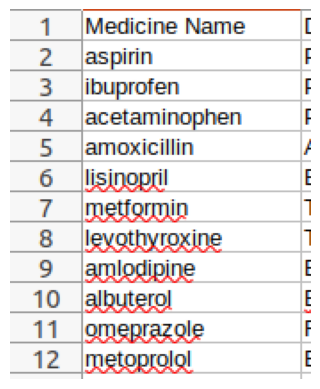

In [ ]:
# Read the image
img_presc = cv2.imread(IMAGE_PATH)

# Check if the image was loaded successfully
if img_presc is not None:
    # OpenCV loads images in BGR format, convert to RGB for proper display in matplotlib
    img_rgb = cv2.cvtColor(img_presc, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Error: Image could not be loaded. Please check the path.")

In [ ]:
reader = easyocr.Reader(['en'], gpu=False)
# result = reader.readtext(preprocess_image(img_presc))
result = reader.readtext(img_presc)
result

[([[41, 3], [135, 3], [135, 19], [41, 19]],
  'Medicine Name',
  0.9943889204911449),
 ([[41, 21], [83, 21], [83, 37], [41, 37]], 'aspirin', 0.8032753870407502),
 ([[41, 37], [99, 37], [99, 53], [41, 53]], 'ibuprofen', 0.9999302613497288),
 ([[41, 55], [133, 55], [133, 69], [41, 69]],
  'acetaminophen',
  0.9453261298427909),
 ([[41, 71], [105, 71], [105, 85], [41, 85]],
  'amoxicillin',
  0.9998727566163425),
 ([[41, 89], [91, 89], [91, 105], [41, 105]],
  'lisinopril',
  0.7729202541925367),
 ([[41, 105], [103, 105], [103, 123], [41, 123]],
  'metformin',
  0.761963126182357),
 ([[41, 123], [121, 123], [121, 139], [41, 139]],
  'levothyroxine',
  0.5593916644529561),
 ([[39, 137], [107, 137], [107, 157], [39, 157]],
  'lamlodipine',
  0.8966392079353414),
 ([[39, 155], [91, 155], [91, 173], [39, 173]],
  'lalbuterol',
  0.7970186282561786),
 ([[41, 175], [111, 175], [111, 191], [41, 191]],
  'omeprazole',
  0.7905801527526007),
 ([[9, 187], [31, 187], [31, 205], [9, 205]], '12', 0.99

In [ ]:
for i in result:
  text = i[1]
  if "TAB" in text or "CAP" in text:    # i[1] is text. for project, loop through all medicines in database as well
    print(text)

# Medicine extraction from dB and extracted text

In [ ]:
df = pd.read_csv("/content/medicines.csv")

In [ ]:
medicine_list = df['Medicine Name'].tolist()
print(medicine_list)

['aspirin', 'ibuprofen', 'acetaminophen', 'amoxicillin', 'lisinopril', 'metformin', 'levothyroxine', 'amlodipine', 'albuterol', 'omeprazole', 'metoprolol', 'sertraline', 'gabapentin', 'losartan', 'atorvastatin', 'escitalopram', 'fluoxetine', 'pantoprazole', 'hydrocodone', 'clopidogrel', 'doxycycline', 'furosemide', 'hydrochlorothiazide', 'azithromycin', 'gabapentin', 'prednisone', 'citalopram', 'clonazepam', 'tramadol', 'allopurinol', 'alprazolam', 'warfarin', 'rosuvastatin', 'duloxetine', 'topiramate', 'spironolactone', 'venlafaxine', 'celecoxib', 'tamsulosin', 'zofran', 'bupropion', 'pravastatin', 'clonidine', 'insulin glargine', 'gabapentin', 'morphine', 'lamotrigine', 'zolpidem', 'quetiapine', 'valsartan', 'ketorolac', 'bisoprolol', 'esomeprazole', 'loratadine', 'montelukast', 'oxycodone', 'pioglitazone', 'ranitidine', 'sitagliptin', 'atenolol', 'fentanyl', 'methotrexate', 'aripiprazole', 'rifampin', 'lithium', 'rivastigmine', 'spironolactone']


In [ ]:
caught_medicines = []  # Initialize an empty list to store caught medicines

for i in result:
    text = i[1]
    for m in medicine_list:
        if m in text:
            caught_medicines.append(m)  # Add the caught medicine to the list

# Convert the list of caught medicines to a string and print it at the end
if caught_medicines:
    print("Give me details of:", ', '.join(caught_medicines))
else:
    print("No medicines caught.")


Give me details of: aspirin, ibuprofen, acetaminophen, amoxicillin, lisinopril, metformin, levothyroxine, amlodipine, albuterol, omeprazole, metoprolol
